# IMDb Best and Worst title analysis

##### Name: Edvards Mazprecnieks
Student number: 21.01.020


### Motivation and the goal (a paragraph)

The goal is to explore and analyze if there is a difference between popularity (or number of ratings) and the rating itself. Are good movies / TV shows watched more than bad ones? What about ratings over the years? Are there any trends over genres?

##### Questions to analyse

1. Are there any visible connection between number of votes and ratings?
2. Are there any particularly good or bad titles that stands out?
3. Which range of years have the worst and best ratings for titles?
4. Which are the best and worst rated genres?

##### Datasets explained

imdb_worst - This dataset contains a list of the 1000 worst-rated titles on IMDb, including both movies and TV series, focusing on titles that have received over 10,000 votes. (Copied from kaggle)

imdb_best - This dataset contains a list of over 6,000 top-rated titles on IMDb, including both movies and TV series, with a minimum average user rating of 7 and over 10,000 votes. (Copied from kaggle)

##### Reference to the datasets

imdb_worst - https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-worst-rated-titles

imdb_best - https://www.kaggle.com/datasets/octopusteam/imdb-top-rated-titles-movies-and-tv-series

Both datasets were last accessed and downloaded for this project on 29.10.2024 at 22:40.

#### Imports and formatting

Necessary modules are imported and numbers are formatted with two numbers after comma so that it does not show scientific format in tables.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

#### Data importing and analysis

In [2]:
df_best = pd.read_csv('imdb_best.csv', sep=',')

print(df_best.shape)
print(df_best.dtypes)
df_best.head(10)

(6029, 7)
id                object
title             object
type              object
genres            object
averageRating    float64
numVotes           int64
releaseYear        int64
dtype: object


,id,title,type,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,tvSeries,"Crime, Drama, Thriller",9.50,2222701,2008
1,tt5491994,Planet Earth II,tvMiniSeries,Documentary,9.50,161347,2016
2,tt0185906,Band of Brothers,tvMiniSeries,"Drama, History, War",9.40,543177,2001
3,tt0795176,Planet Earth,tvMiniSeries,"Documentary, Family",9.40,222871,2006
4,tt5152226,Tree of Life,tvSeries,Drama,9.40,11663,2014
5,tt0111161,The Shawshank Redemption,movie,Drama,9.30,2954554,1994
6,tt7366338,Chernobyl,tvMiniSeries,"Drama, History, Thriller",9.30,901038,2019
7,tt0306414,The Wire,tvSeries,"Crime, Drama, Thriller",9.30,388754,2002
8,tt0417299,Avatar: The Last Airbender,tvSeries,"Action, Adventure, Animation",9.30,387280,2005
9,tt30263074,Sapne Vs Everyone,tvSeries,Drama,9.30,70756,2023


Here in the shape of the dataframe it is visible there are 6029 rows and 7 columns, meaning there are 6029 titles listed. Based on dtypes it is visible there are id, title, type, genres, average rating, number of votes and release year. All data types seem to be correct. By calling head, it is visible how this data is listed in the table. It seems to be sorted by average rating, meaning the best movie is The Shawshank Redemption and the best title is TV series Breaking Bad.

In [3]:
df_best.isna().sum()

id               0
title            0
type             0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64

By calling this, I can see there is no missing data in the dataframe.

In [4]:
df_best.describe()

,averageRating,numVotes,releaseYear
count,"6,029.00","6,029.00","6,029.00"
mean,7.70,"116,372.88","2,000.59"
std,0.47,"226,620.60",21.65
min,7.10,"10,009.00","1,916.00"
25%,7.30,"16,547.00","1,992.00"
50%,7.60,"33,223.00","2,008.00"
75%,8.00,"104,254.00","2,016.00"
max,9.50,"2,954,554.00","2,024.00"


Calling the describe function, I can see the overall statistics of the data. For example, here I can see that the mean of ratings is 7.7. I can also see that the minimum rating here is 7.1 and max rating is 9.5. I can also see the most votes for a title is 2954554, which seems to be a lot more than the minimum 10009 votes. I can also see that most movies have under 100000 votes, which is 75% of the data.

In [5]:
df_worst = pd.read_csv('imdb_worst.csv', sep=',')

print(df_worst.shape)
print(df_worst.dtypes)
df_worst.head(10)

(1000, 6)
id                object
title             object
genres            object
averageRating    float64
numVotes           int64
releaseYear        int64
dtype: object


,id,title,genres,averageRating,numVotes,releaseYear
0,tt5988370,Reis,"Biography, Drama",1.00,74162,2017
1,tt7221896,Cumali Ceber: Allah Seni Alsin,Comedy,1.00,39463,2017
2,tt13423846,321 Action,Drama,1.00,10212,2020
3,tt20255706,The Pogmentary,"Biography, Documentary, Sport",1.10,13807,2022
4,tt21403988,The Last Pharaoh,"Documentary, Drama, History",1.10,12020,2023
5,tt21194980,Golden Bull,"Action, Documentary, Drama",1.10,11173,2022
6,tt7886848,Sadak 2,"Action, Drama",1.20,96849,2020
7,tt27528139,Queen Cleopatra,"Documentary, Drama, History",1.20,86298,2023
8,tt6038600,Smolensk,"Drama, Thriller",1.20,40226,2016
9,tt14878948,15/07: Break of Dawn,"Action, Drama, War",1.20,20686,2021


I call the same commands for worst rated titles as well. Here in the shape of the dataframe it is visible there are only 1000 rows and 6 columns. The number of rows are as expected based on the description of the dataframe, meaning there are only 1000 titles listed. Based on dtypes it is visible there are id, title, genres, average rating, number of votes and release year. Comparing to the other dataframe, there is no type mentioned as in the other one. All data types seem to be correct. By calling head, it is visible how this data is listed in the table. It seems to be sorted by average rating, meaning the worst title is called Reis which is a Biography and Drama title.

In [6]:
df_worst.isna().sum()

id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64

In this dataframe I can also see there is no missing data.

In [7]:
df_worst.describe()

,averageRating,numVotes,releaseYear
count,"1,000.00","1,000.00","1,000.00"
mean,4.33,"34,207.35","2,009.37"
std,0.89,"35,894.83",10.69
min,1.00,"10,003.00","1,957.00"
25%,4.00,"13,458.75","2,003.00"
50%,4.70,"21,499.50","2,011.00"
75%,5.00,"41,100.75","2,018.00"
max,5.20,"340,817.00","2,024.00"


Calling the describe function, I can see the overall statistics of the data. For example, here I can see that the mean of ratings is 4.33. I can also see that the minimum rating here is 1.0 and max rating is 5.2. I can also see the most votes for a title is 340817, which seems to be a lot less than the maximum number of votes in the other dataframe. I can also see that most movies have under 41100 votes, which is 75% of the data.

#### Data plotting

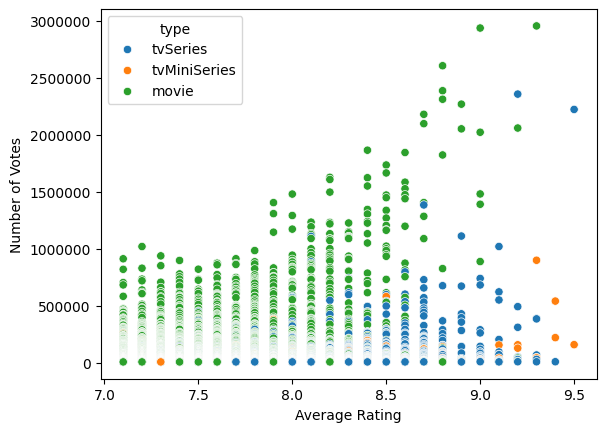

In [8]:
sns.scatterplot(data=df_best, x='averageRating', y='numVotes', hue='type')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

Here I plot the best rated titles. On x axis I chose to display average rating, but for y axis the number of votes. In this plot it is visible that there is a trend of more votes when there is a better rating. I added types as hue for fun to possibly notice any trends of title types. Since these points are so close to one another, not all points can be seen.
To emphasize this more, I will make another graph with a line of mean number of votes across average ratings.

In [9]:
data = []
for rating in range(71, 96):
    rating = round(rating * 0.1, 1)
    data.append([rating, df_best['numVotes'][df_best['averageRating'] == rating].mean()])

df_votes = pd.DataFrame(data, columns=['averageRating', 'numVotes'])
df_votes.head(10)

,averageRating,numVotes
0,7.10,"78,343.45"
1,7.20,"78,559.56"
2,7.30,"84,600.89"
3,7.40,"80,546.41"
4,7.50,"84,489.17"
5,7.60,"95,194.30"
6,7.70,"102,139.28"
7,7.80,"116,582.11"
8,7.90,"114,330.32"
9,8.00,"129,975.96"


Here I do data preparation for a line plot. I calculate number of votes for each rating to create a dataframe to plot.

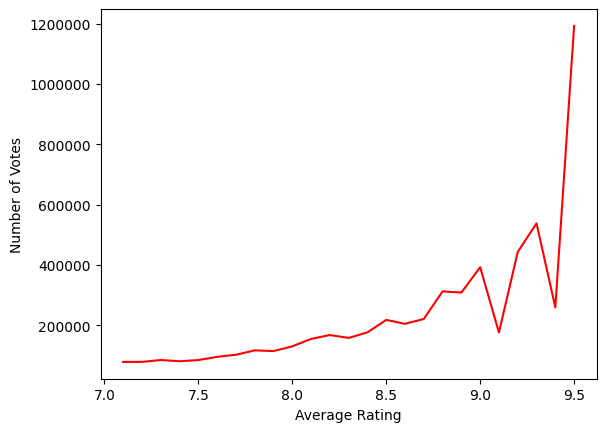

In [10]:
plt.plot(df_votes['averageRating'], df_votes['numVotes'], color='red')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

In this plot, it is more clearly visible what was already seen in the previous plot - these seem to be more number of votes as the average rating grows.

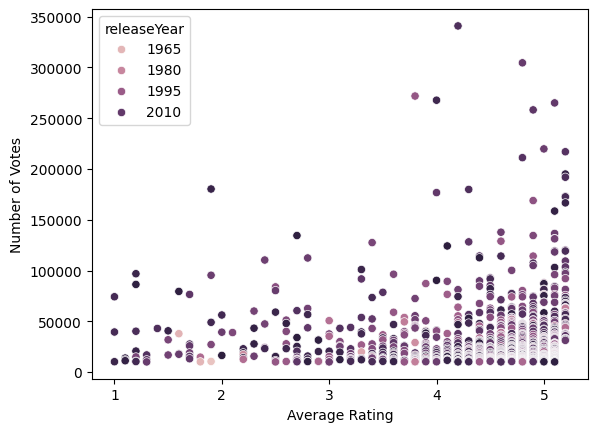

In [11]:
sns.scatterplot(data=df_worst, x='averageRating', y='numVotes', hue='releaseYear')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

Here I plot the worst rated titles. I do it with the same settings as for the best rated titles. In this plot it is also visible that there is a trend of more votes when there is a better rating. I added release year as hue for fun to possibly notice any trends of title types.

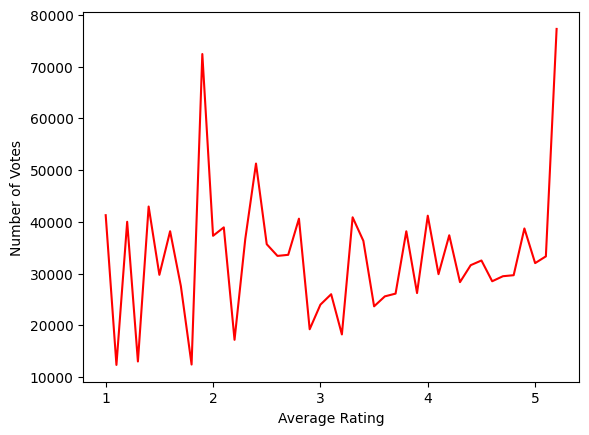

In [12]:
data = []
for rating in range(10, 53):
    rating = round(rating * 0.1, 1)
    data.append([rating, df_worst['numVotes'][df_worst['averageRating'] == rating].mean()])

df_votes = pd.DataFrame(data, columns=['averageRating', 'numVotes'])

plt.plot(df_votes['averageRating'], df_votes['numVotes'], color='red')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

But this plot does not prove the point before. In this plot, it is not clearly visible what was seen previously - there seem to be no trend through ratings. To continue on, I will combine the two datasets and analyse them together.

In [13]:
df_best['category'] = 'best'
df_worst['category'] = 'worst'

df = pd.concat([df_best, df_worst])
df.head(10)

,id,title,type,genres,averageRating,numVotes,releaseYear,category
0,tt0903747,Breaking Bad,tvSeries,"Crime, Drama, Thriller",9.50,2222701,2008,best
1,tt5491994,Planet Earth II,tvMiniSeries,Documentary,9.50,161347,2016,best
2,tt0185906,Band of Brothers,tvMiniSeries,"Drama, History, War",9.40,543177,2001,best
3,tt0795176,Planet Earth,tvMiniSeries,"Documentary, Family",9.40,222871,2006,best
4,tt5152226,Tree of Life,tvSeries,Drama,9.40,11663,2014,best
5,tt0111161,The Shawshank Redemption,movie,Drama,9.30,2954554,1994,best
6,tt7366338,Chernobyl,tvMiniSeries,"Drama, History, Thriller",9.30,901038,2019,best
7,tt0306414,The Wire,tvSeries,"Crime, Drama, Thriller",9.30,388754,2002,best
8,tt0417299,Avatar: The Last Airbender,tvSeries,"Action, Adventure, Animation",9.30,387280,2005,best
9,tt30263074,Sapne Vs Everyone,tvSeries,Drama,9.30,70756,2023,best


Firstly, I add category to see which data I got from best rated titles, and which one from worst rated titles. Then, I combine them using concat and see if the table looks correctly. It does so far.

In [14]:
df.isna().sum()

id                  0
title               0
type             1000
genres              0
averageRating       0
numVotes            0
releaseYear         0
category            0
dtype: int64

But to double check, I check for missing data. There seem to be no type for 1000 titles which is as predicted as the worst titles dataframe did not have type category.

In [15]:
df = df.drop(columns=['type'])
df.isna().sum()

id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
category         0
dtype: int64

Now it seems all correct and I can make the same plots as before.

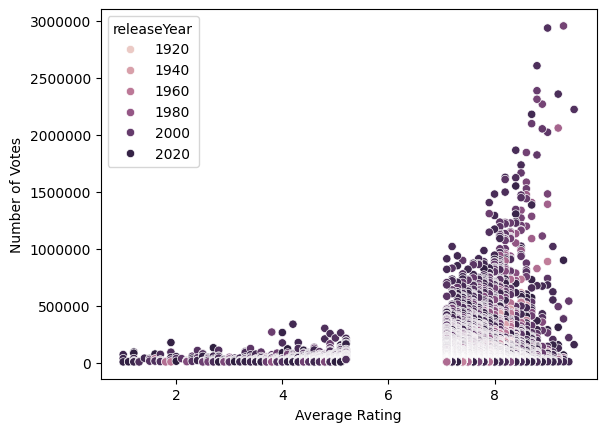

In [16]:
sns.scatterplot(data=df, x='averageRating', y='numVotes', hue='releaseYear')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

Now the trend of number of votes on average rating seem to come out more as best rated titles have more number of votes but I will explore that further with a line plot later on. 
In this plot I notice there is outliers. Three of them from worst ones with average rating around 4 and three of them from the best rated ones with average rating around 9. I will try to manually locate them.

In [17]:
find_outliers_worst = df[(df['averageRating'] > 3.5) & (df['averageRating'] < 4.5) & (df['numVotes'] > 200000)]
find_outliers_worst.head(3)

,id,title,genres,averageRating,numVotes,releaseYear,category
188,tt0118688,Batman & Robin,"Action, Sci-Fi",3.80,271790,1997,worst
236,tt6027920,The Iron Throne,"Action, Adventure, Drama",4.00,267688,2019,worst
279,tt2322441,Fifty Shades of Grey,"Drama, Romance, Thriller",4.20,340817,2015,worst


These outliers have more votes than other titles with the same ratings, which might mean they are more popular than other worst rated titles.

In [18]:
find_outliers_best = df[(df['averageRating'] > 8.5) & (df['numVotes'] > 2400000)]
find_outliers_best.head(3)

,id,title,genres,averageRating,numVotes,releaseYear,category
5,tt0111161,The Shawshank Redemption,Drama,9.30,2954554,1994,best
44,tt0468569,The Dark Knight,"Action, Crime, Drama",9.00,2936136,2008,best
101,tt1375666,Inception,"Action, Adventure, Sci-Fi",8.80,2605707,2010,best


These outliers have more votes than other titles with the same ratings, which might mean they are more popular than other best rated titles.

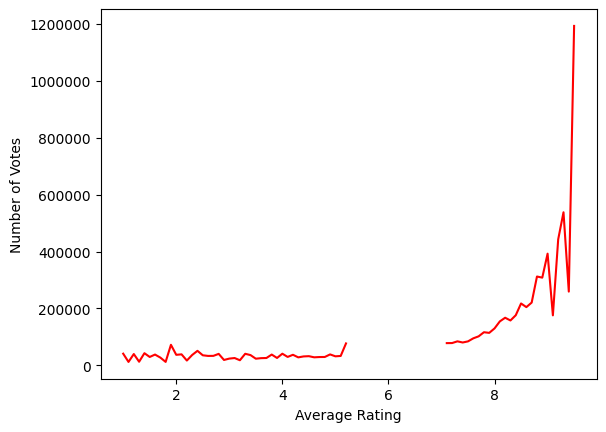

In [19]:
data = []
for rating in range(10, 96):
    rating = round(rating * 0.1, 1)
    data.append([rating, df['numVotes'][df['averageRating'] == rating].mean()])

df_votes = pd.DataFrame(data, columns=['averageRating', 'numVotes'])

plt.plot(df_votes['averageRating'], df_votes['numVotes'], color='red')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

In this line plot it is very visible that better ratings do have more votes. There is a cut for average rating from around 5 to 7 which movies does not qualify as neither best or worst rated movies, but the trend is still very noticable.

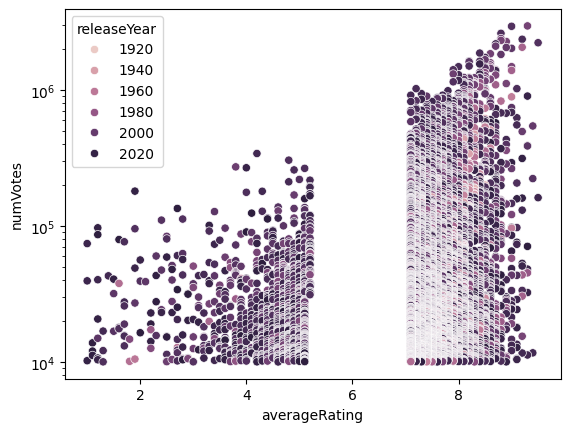

In [20]:
plot = sns.scatterplot(data=df, x='averageRating', y='numVotes', hue='releaseYear')
plot.set_yscale('log')
plt.show()

I also wanted to see if there is another trend that can be noticed by calculating logarithmic scale. I think in this plot there is no trend that can be noticed and it looks more normal.

In [21]:
result, year_list = pd.qcut(df['releaseYear'], q=20, retbins=True)

def calculate_average(df, start, end):
    return df[(df['releaseYear'] > start) & (df['releaseYear'] <= end)]['averageRating'].mean()

averages = {}

for i in range(len(year_list) - 1):
    start = year_list[i].round(0)
    end = year_list[i + 1].round(0)
    averages[f"{start} to {end}"] = calculate_average(df, start, end)

averages_df = pd.DataFrame(averages.items(), columns=['Year range', 'Average rating'])
averages_df

,Year range,Average rating
0,1916.0 to 1956.0,7.70
1,1956.0 to 1970.0,7.60
2,1970.0 to 1981.0,7.63
3,1981.0 to 1989.0,7.33
4,1989.0 to 1994.0,7.18
5,1994.0 to 1998.0,7.19
6,1998.0 to 2002.0,7.08
7,2002.0 to 2004.0,7.18
8,2004.0 to 2006.0,6.97
9,2006.0 to 2008.0,6.96


To analyse movie ratings over the years, I calculate bins to have around the same number of movies for each year range. Then, for each bin, I calculate the average rating. In the end, I put this data into a dataframe. Now, I have a dataframe with 20 year ranges with their average ratings. Time to plot!

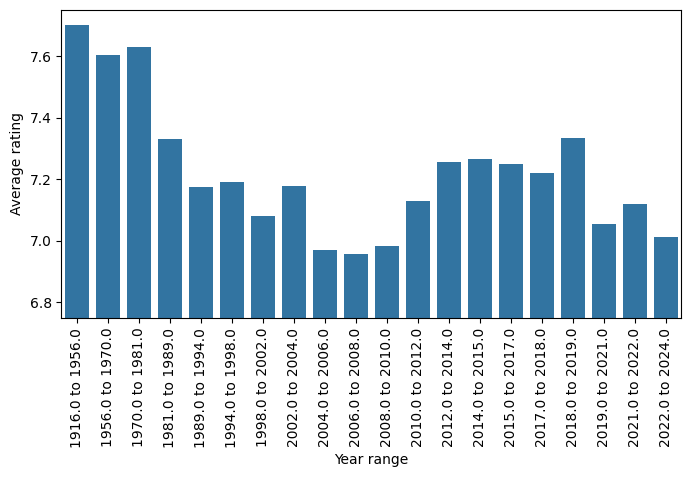

In [22]:
plt.figure(figsize=(8,4))
plot = sns.barplot(data=averages_df, x='Year range', y='Average rating')
plot.set_xticks(plot.get_xticks())
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.ylim(6.75, 7.75)
plt.show()

In a barplot, it is very noticable which years were better or worse for titles. For example, the best years seem to be between 1916 - 1956 and the worst years seem to be 2006 - 2008.

In [23]:
one_hot = df['genres'].str.get_dummies(sep=', ')
df_genres = pd.concat([df, one_hot], axis=1)
df_genres = df_genres.drop(columns=['genres'])
df_genres.head(10)

,id,title,averageRating,numVotes,releaseYear,category,Action,Adventure,Animation,Biography,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0903747,Breaking Bad,9.50,2222701,2008,best,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,tt5491994,Planet Earth II,9.50,161347,2016,best,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0185906,Band of Brothers,9.40,543177,2001,best,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,tt0795176,Planet Earth,9.40,222871,2006,best,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt5152226,Tree of Life,9.40,11663,2014,best,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0111161,The Shawshank Redemption,9.30,2954554,1994,best,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt7366338,Chernobyl,9.30,901038,2019,best,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,tt0306414,The Wire,9.30,388754,2002,best,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,tt0417299,Avatar: The Last Airbender,9.30,387280,2005,best,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,tt30263074,Sapne Vs Everyone,9.30,70756,2023,best,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now I have done one hot encoding to get data to calculate average ratings based on genres. 

In [24]:
genre_ratings = one_hot.mul(df['averageRating'], axis=0)

average_ratings_by_genre = genre_ratings[one_hot == 1].mean()

average_ratings_by_genre_df = average_ratings_by_genre.reset_index()
average_ratings_by_genre_df.columns = ['Genre', 'Average Rating']

average_ratings_by_genre_df.head(10)

,Genre,Average Rating
0,Action,6.96
1,Adventure,7.09
2,Animation,7.72
3,Biography,7.55
4,Comedy,7.10
5,Crime,7.38
6,Documentary,7.60
7,Drama,7.46
8,Family,6.76
9,Fantasy,6.82


By multiplying all genre data points and calculate means of this data I get result as an average rating for each genre. The table looks correct so we can proceed.

In [25]:
average_ratings_by_genre_df_dsc = average_ratings_by_genre_df.sort_values(by='Average Rating', ascending=False)
average_ratings_by_genre_df_dsc.head(10)

,Genre,Average Rating
17,News,8.11
23,Talk-Show,7.88
2,Animation,7.72
10,Film-Noir,7.70
25,War,7.70
6,Documentary,7.60
12,History,7.60
3,Biography,7.55
11,Game-Show,7.55
26,Western,7.53


Now I sort the table based by rating. Here, I can already see that News, Talk-Show and Animation are the best rated genres.

/var/folders/gn/62yy89nx5z13c15k42zdz2z40000gn/T/ipykernel_8195/1571870604.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


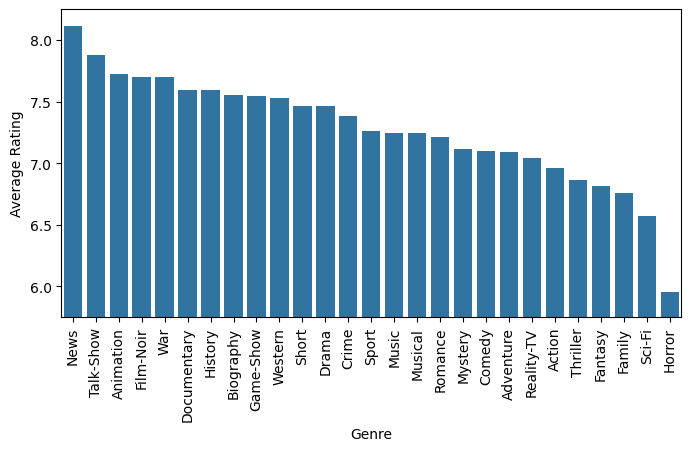

In [26]:
plt.figure(figsize=(8,4))
plot = sns.barplot(data=average_ratings_by_genre_df_dsc, x='Genre', y='Average Rating')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.ylim(5.75, 8.25)
plt.show()

But to further emphasize best and worst rated genres, I have done a bar plot. Here we can easily see al this data, for example, Horror being rated as the worst genre, Sport and Music being somewhere close to middle and News being the best genre.

## Summary

I think it is very important to mention here that this data should not be used as conclusive, as this data does not use all IMDb titles, but only best and worst ones, meaning there is data missing in the middle. However, for the purpose of this project, I will write my conclusions based on this data.

1. Are there any visible connection between number of votes and ratings?

    Honestly, yes. The best rated movies have many more ratings than worse rated ones. From this I can also conclude that best rated movies are more popular and have more viewers.

2. Are there any particularly good or bad titles that stands out?

    Yes, as noticed during the project, there are outliers clearly seen in the plot. These are titles that have more votes then rest around the same average rating. These noticed outliers are:

        From worst rated titles
        1. Batman & Robin (Rating 3.8 with 271790 votes)
        2. The Iron Throne (Rating 4.0 with 267688 votes)
        3. Fifty Shades of Grey (Rating 4.2 with 340817 votes)

        From best rated titles
        1. The Shawshank Redemption (Rating 9.3 with 2954554 votes)
        2. The Dark Knight (Rating 9.0 with 2936136 votes)
        3. Inception (Rating 8.8 with 2605707 votes)

3. Which range of years have the worst and best ratings for titles?

    After analysing this, I am very intrigued to see that older titles are better rated than newer ones. 

    The best rated year range is 1916 - 1956 (average rating 7.7). The worst rated year range is 2006 - 2008 (average rating 6.96).

    Even in the most recent year range (2002 - 2004) the average rating is 7.01, which is a bit far away from rating 7.7. Meaning people prefer older than newer titles.

4. Which are the best and worst rated genres?

    Based on my data, the 3 best rated genres are News, Talk-Show and Animation. The 3 worst rated genres are Horror, Sci-Fi and Family.